# Heart Attack Analysis and Prediction

In [1]:
%matplotlib inline
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data LoadingProfileReport

In [2]:
# Load data
df = pd.read_csv('data/heart.csv')

In [40]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [45]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [44]:
# Unique values
dict = {}

for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]
    
pd.DataFrame(dict, index = ['unique values']).transpose()

,unique values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


## EDA

In [51]:
# Enable widgets for PD profiling
! jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [52]:
# Use pandas profiling to get a wide overview
profile = ProfileReport(df, title = 'Heart Attack Analysis')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

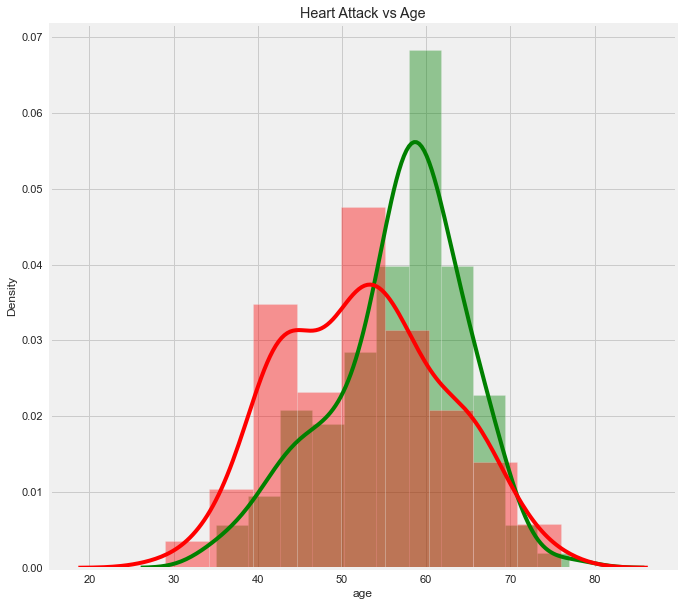

In [56]:
# Heart attack vs age
plt.figure(figsize=(10,10))
sns.distplot(df[df['output'] == 0]["age"], color='green',kde=True,) 
sns.distplot(df[df['output'] == 1]["age"], color='red',kde=True)
plt.title('Heart Attack vs Age')
plt.show()

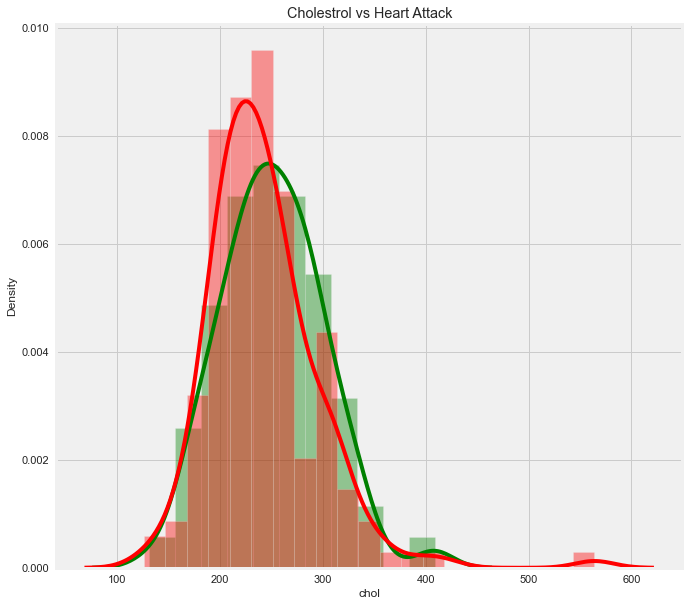

In [59]:
# Cholestrol vs heart attack
plt.figure(figsize=(10,10))
sns.distplot(df[df['output'] == 0]["chol"], color='green',kde=True,) 
sns.distplot(df[df['output'] == 1]["chol"], color='red',kde=True)
plt.title('Cholestrol vs Heart Attack')
plt.show()

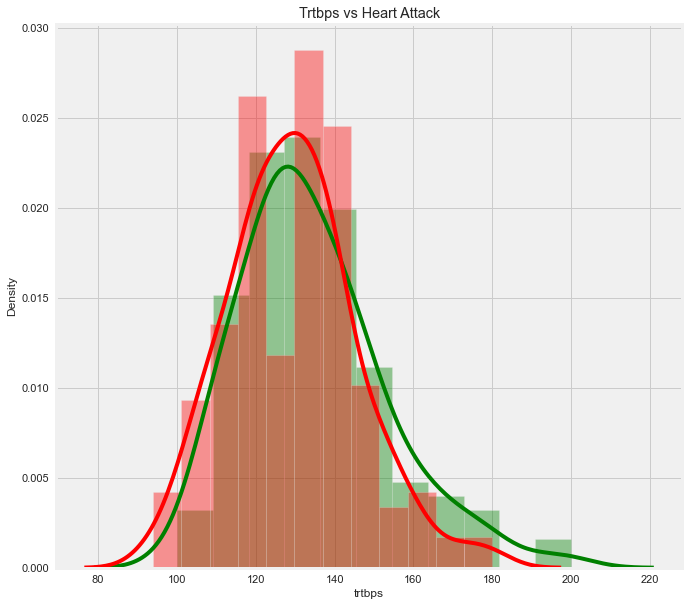

In [62]:
# Trtbps vs Heart Attack
plt.figure(figsize=(10,10))
sns.distplot(df[df['output'] == 0]["trtbps"], color='green',kde=True,) 
sns.distplot(df[df['output'] == 1]["trtbps"], color='red',kde=True)
plt.title('Trtbps vs Heart Attack')
plt.show()

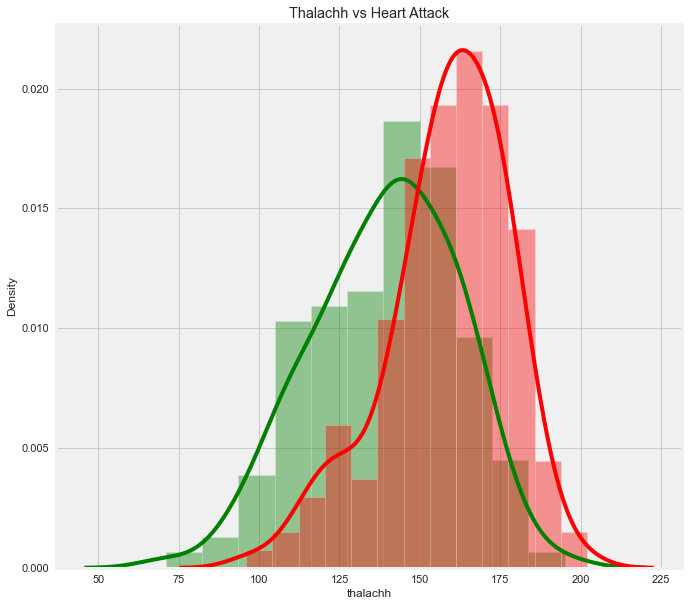

In [63]:
# Thalach vs Heart Attack
plt.figure(figsize=(10,10))
sns.distplot(df[df['output'] == 0]["thalachh"], color='green',kde=True,) 
sns.distplot(df[df['output'] == 1]["thalachh"], color='red',kde=True)
plt.title('Thalachh vs Heart Attack')
plt.show()

<Figure size 1440x1440 with 0 Axes>

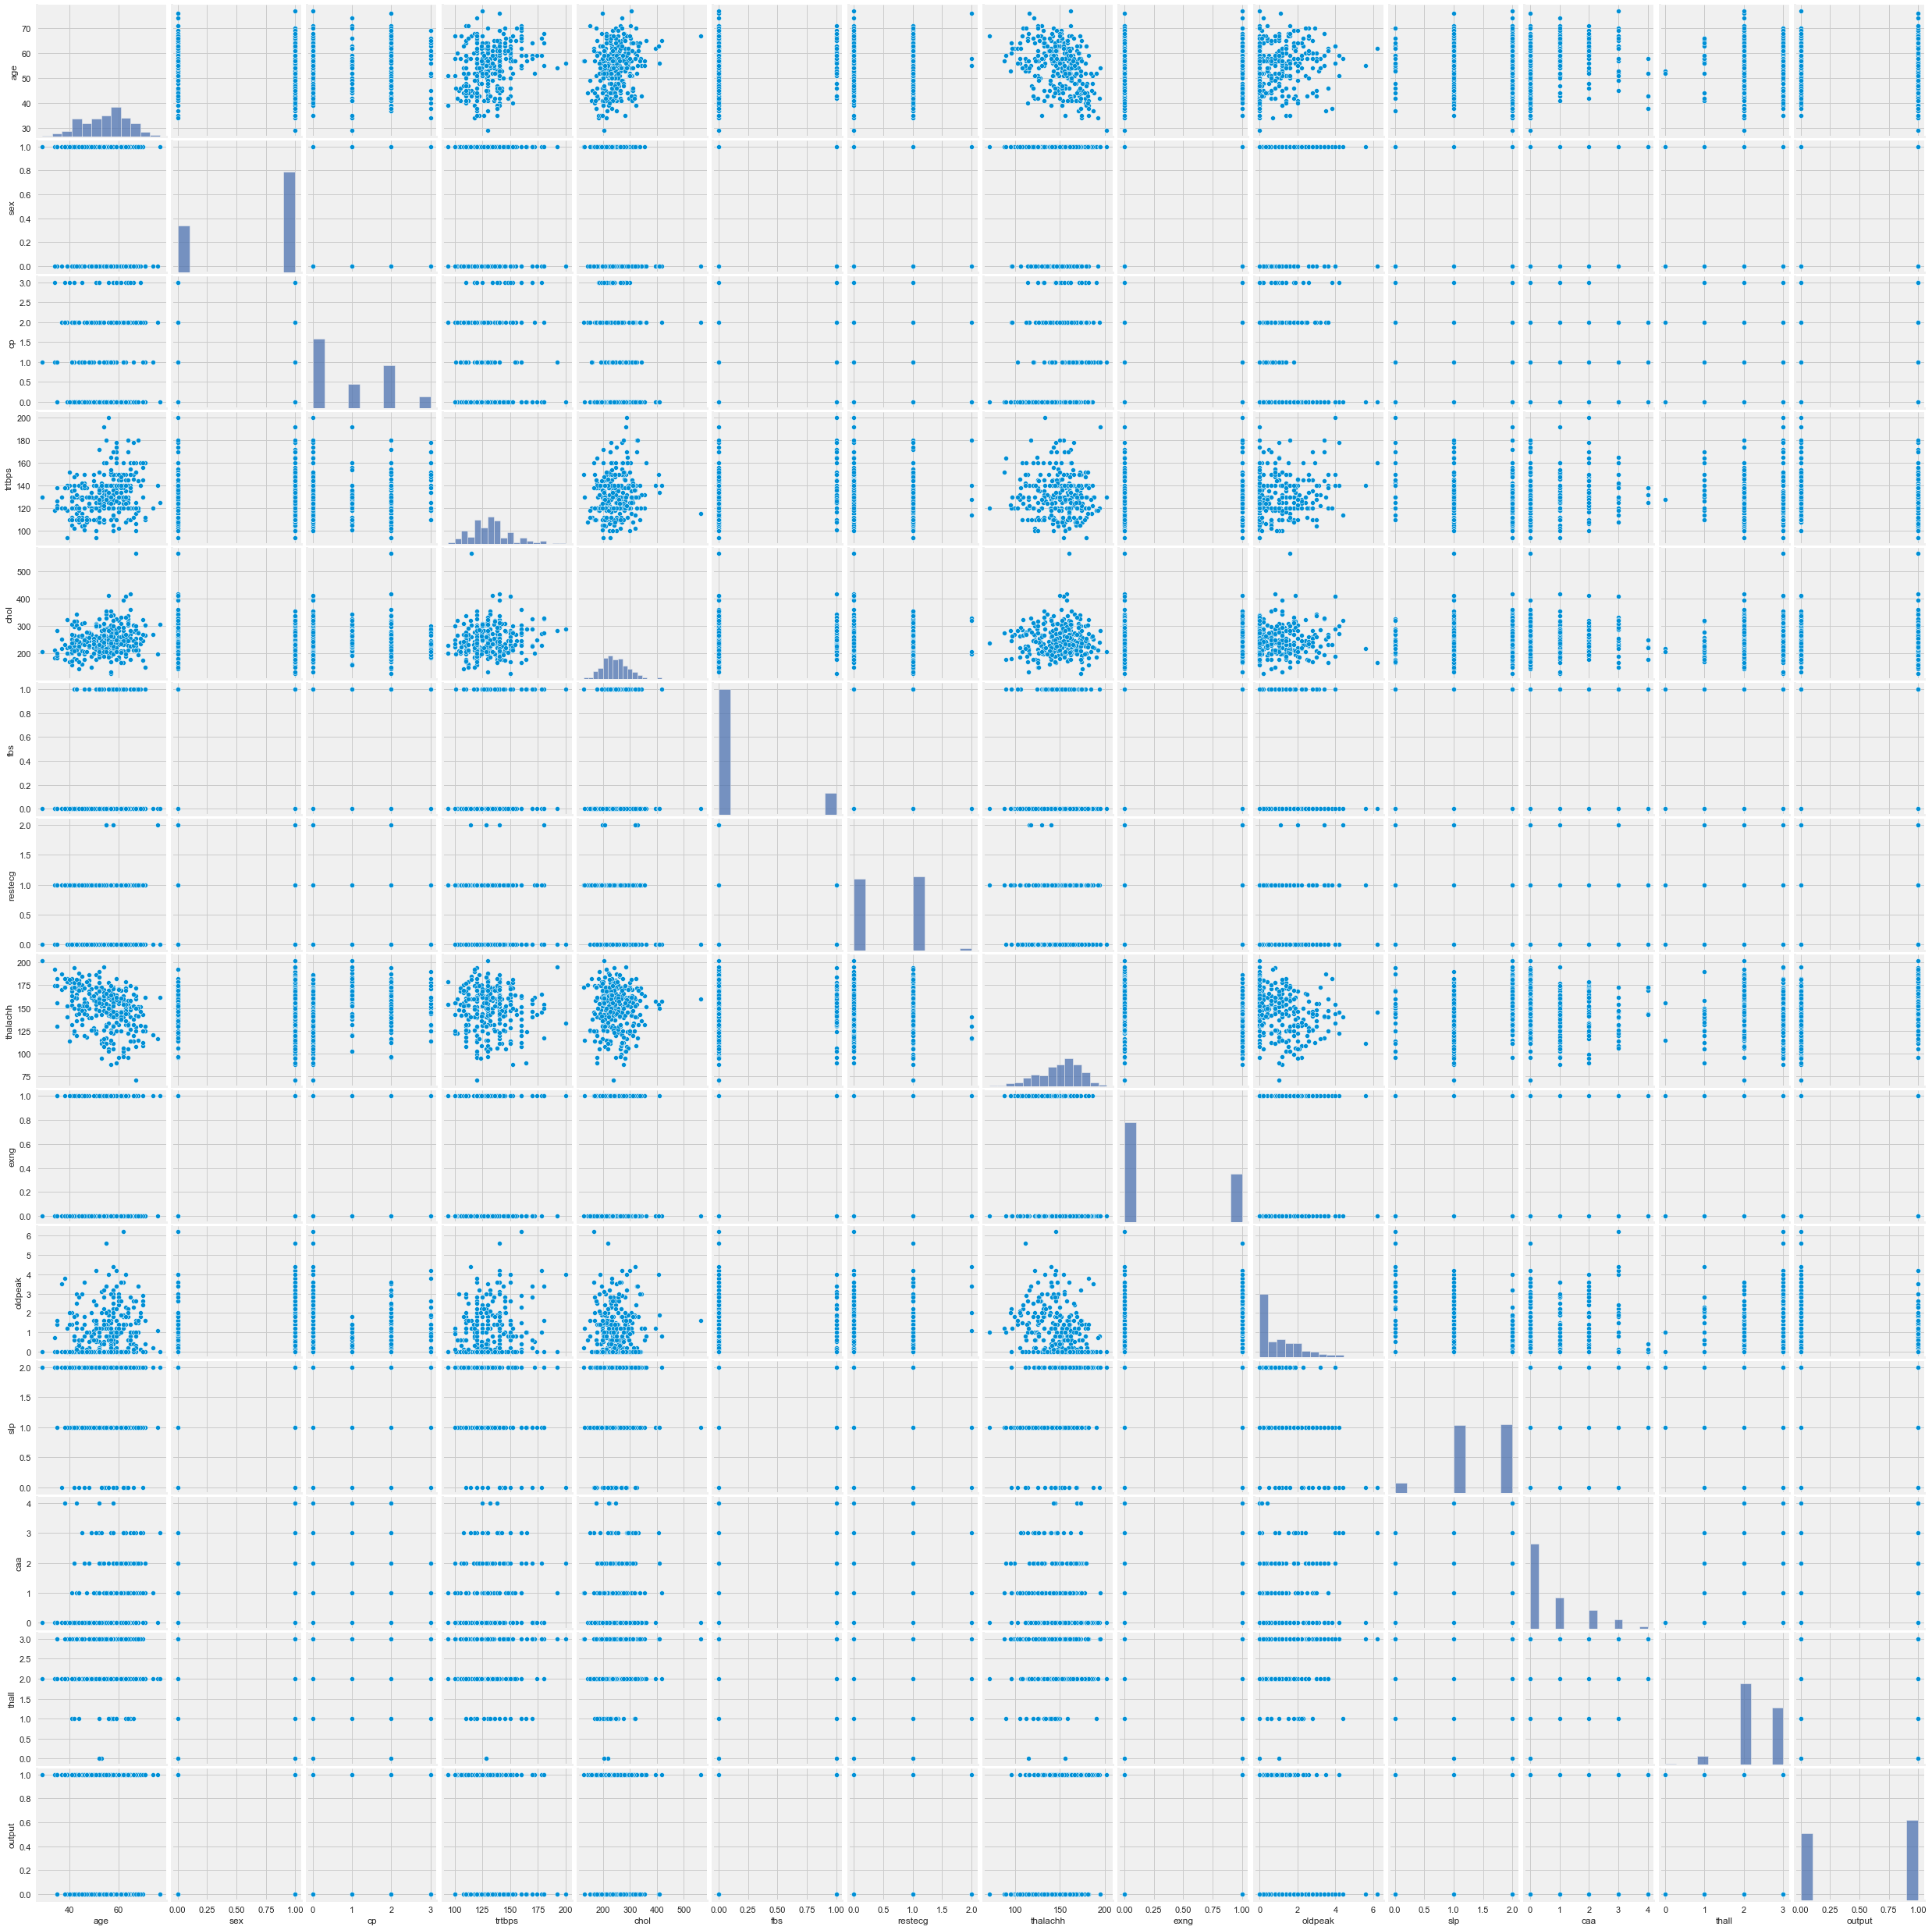

In [64]:
# Pair plot
plt.figure(figsize=(20,20))
sns.pairplot(df)
plt.show()

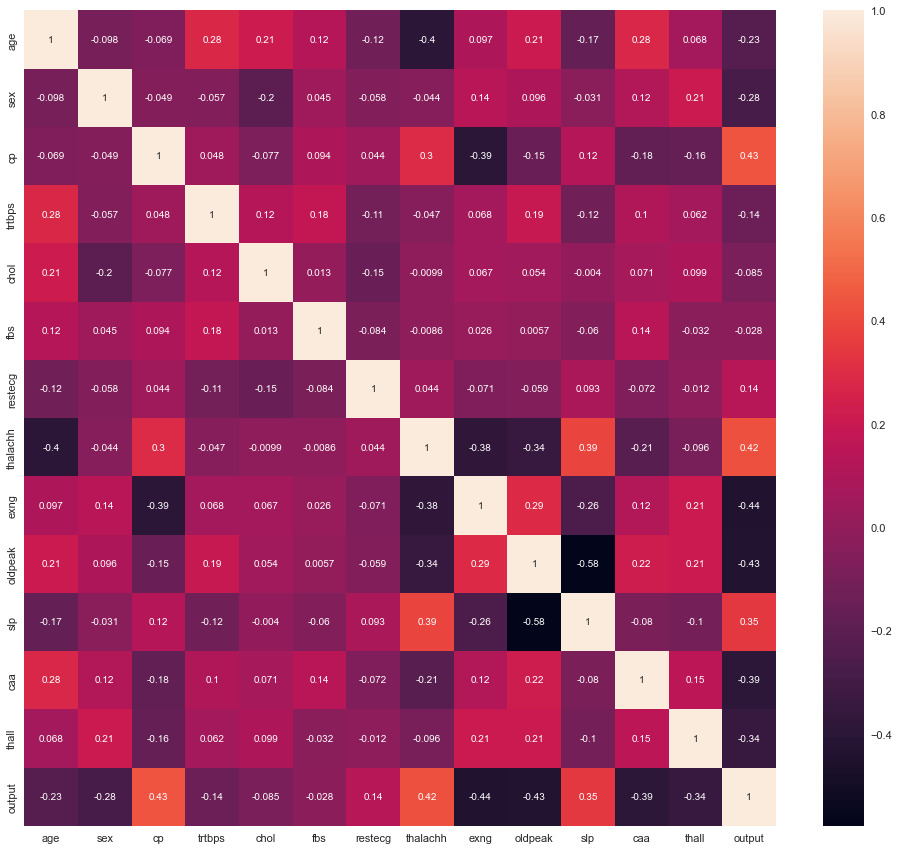

In [66]:
# Correlation matrix
plt.figure(figsize = (15, 15))
corr = df.corr()
sns.heatmap(corr, annot = True)
plt.show()

## Data Preprocessing

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Split to X and y
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [5]:
# Split into train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print('Training set size: ', X_train.shape[0])
print('Testing set size: ', X_test.shape[0])

Training set size:  242
Testing set size:  61


In [6]:
# Scale data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Models Training and Evaluation

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Logistic Regression

In [18]:
lr_clf = LogisticRegression()

# Fit
print('Fitting Model...')
lr_clf.fit(X_train, y_train)

# Get Accuracy
print('Calculating Accuracy...')
y_pred_proba = lr_clf.predict_proba(X_test)
y_pred = np.argmax(y_pred_proba,axis=1)
print('Logistic Regression Accuracy: ', accuracy_score(y_test, y_pred))

Fitting Model...
Calculating Accuracy...
Logistic Regression Accuracy:  0.8360655737704918


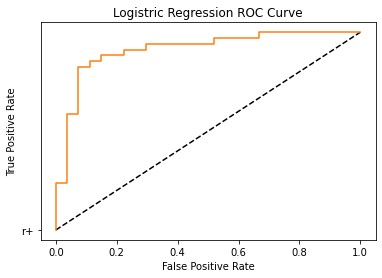

In [19]:
# ROC
# calculating the probabilities
y_pred_prob = lr_clf.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

<AxesSubplot:>

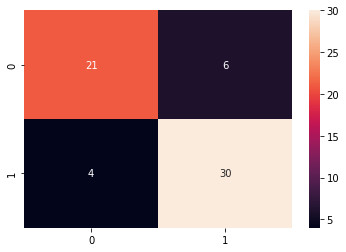

In [20]:
#Get the confusion matrix
lr_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(lr_matrix, annot=True)

### Random Forest

In [21]:
rf_clf = RandomForestClassifier()

# Fit
print('Fitting Model...')
rf_clf.fit(X_train, y_train)

# Get Accuracy
print('Calculating Accuracy...')
y_pred_proba = rf_clf.predict_proba(X_test)
y_pred = np.argmax(y_pred_proba,axis=1)
print('Random Forest Accuracy: ', accuracy_score(y_test, y_pred))

Fitting Model...
Calculating Accuracy...
Random Forest Accuracy:  0.819672131147541


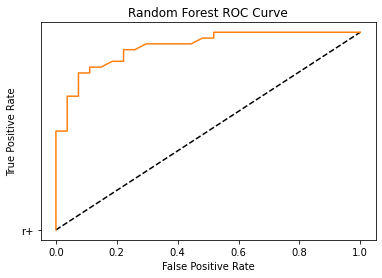

In [24]:
# ROC
# calculating the probabilities
y_pred_prob = rf_clf.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Random Forest')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.show()

<AxesSubplot:>

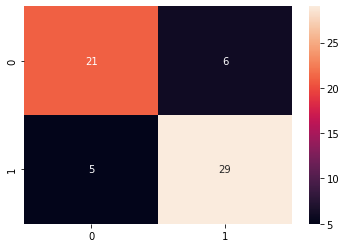

In [23]:
#Get the confusion matrix
rf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(rf_matrix, annot=True)

In [27]:
# Save RF model
import pickle
pickle.dump(rf_clf, open('model/model.sav', 'wb'))